In [1]:
import torch
from torch import optim, nn
import numpy as np
from utils.loader import ScatterData, train_test_split_torch,train_test_split_torch_stratify
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor
from models.generator import get_model
from models.training import train
from tqdm.auto import tqdm
import os
from glob import glob

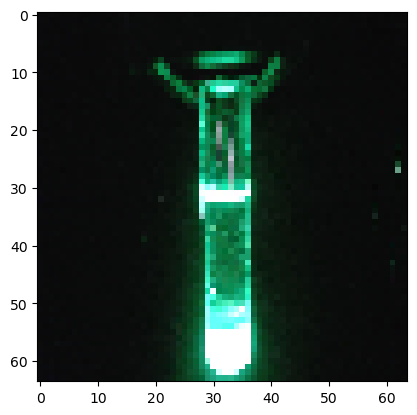

In [2]:
dset=ScatterData(path=r'C:\Users\sedau\Desktop\AIC Group\Experiments\DATA\LASER_SCREEN_IMAGES\Second Setup\520nm 10 con',
                 transform=Compose([ToTensor(),
                                    Resize([64,64],interpolation=InterpolationMode.NEAREST)]),
                 verbose=False)

train_loader,valid_loader=train_test_split_torch(dset,validation_split=0.2,shuffle_dataset=True,batch_size=5)

(x,y)=dset[10]
x=x.permute(1,2,0).numpy()
x=x*127.5+127.5
plt.imshow(x.astype('uint'))

In [3]:
os.chdir(r'C:\Users\sedau\Desktop\AIC Group\Experiments\DATA\LASER_SCREEN_IMAGES\Second Setup\520nm 10 con')
lst=glob('*.jpg')
count=0
lst_soluble=[]
for file in lst:
    f=file.split('_')[-2]
    if f=='INSOLUBLE' : count+=1
    if f=='SOLUBLE' : lst_soluble.append(file)
print('total file : ',len(lst))
print('soluble {}% & insoluble {}%'.format(round((len(lst)-count)/len(lst)*100,3),round(count/len(lst)*100),3))

total file :  38
soluble 47.368% & insoluble 53%


In [4]:
model_resnet=get_model('resnet18',feat=64)

In [5]:
lr = 1e-3
history = train(model=model_resnet,
      optimizer=torch.optim.Adam(model_resnet.parameters(), lr=lr),
      loss_fn=nn.BCELoss(),
      train_loader=train_loader,
      valid_loader=valid_loader,
      epochs=5,
      device='cpu',
      verbose=True,
      path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\weights',
      fname = 'solubility_lr_'+str(lr),
      update=1)

 20%|██        | 1/5 [00:05<00:22,  5.61s/it]

epoch: 0,train loss: 1.5587727734819055, valid loss: 0.004266159376129508, train acc: 0.9354838709677419, valid acc: 1.0


 40%|████      | 2/5 [00:12<00:19,  6.62s/it]

epoch: 1,train loss: 0.04615975927299587, valid loss: 0.0001430007177987136, train acc: 1.0, valid acc: 1.0


 60%|██████    | 3/5 [00:19<00:13,  6.52s/it]

epoch: 2,train loss: 0.004023600038635777, valid loss: 2.342483276152052e-05, train acc: 1.0, valid acc: 1.0


 80%|████████  | 4/5 [00:27<00:06,  6.97s/it]

epoch: 3,train loss: 0.0019671972786454717, valid loss: 2.3162928755482426e-05, train acc: 1.0, valid acc: 1.0


100%|██████████| 5/5 [00:35<00:00,  7.06s/it]

epoch: 4,train loss: 0.0011689940884025418, valid loss: 1.2505335405421647e-05, train acc: 1.0, valid acc: 1.0


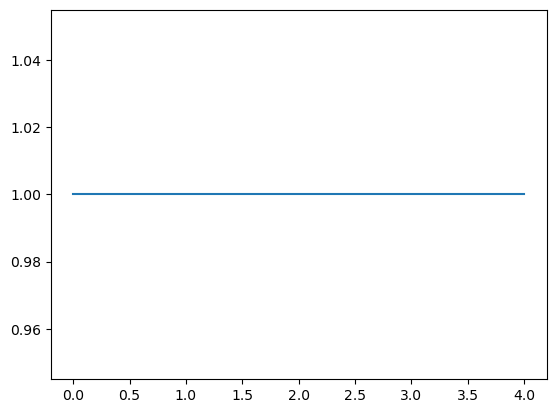

In [6]:
plt.plot(history.test_acc)

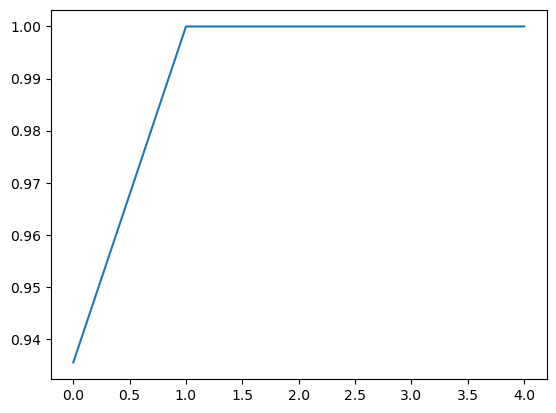

In [7]:
plt.plot(history.train_acc)